# Working memory dataset: Looking at pattern differences

In [1]:
import sys

import numpy as np
import pandas as pd
from pathlib import Path
import os
import nibabel as nb
import nitools as nt
import PcmPy as pcm
import seaborn as sb
import matplotlib.pyplot as plt

import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds

import selective_recruitment.rsa as rsa
import selective_recruitment.recruite_ana as sr
import selective_recruitment.scripts.script_rsa as srsa

In [2]:
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
atlas_dir = base_dir + '/Atlases'


<font color = 'grey'>Defining functions specific to this dataset

In [3]:
DCereb, info, dataset = ds.get_dataset(base_dir,
                                            'WMFS',
                                            atlas='MNISymC3',
                                            sess='ses-02',
                                            type='CondRun')
G1,Ginf = rsa.calc_rsa(DCereb,info,center=True,reorder=['phase','recall'])

DCortex, info, dataset = ds.get_dataset(base_dir,
                                            'WMFS',
                                            atlas='fs32k',
                                            sess='ses-02',
                                            type='CondRun')
G2,Ginf  = rsa.calc_rsa(DCortex,info,center=True,reorder=['phase','recall'])


### Cerebellar RSA 

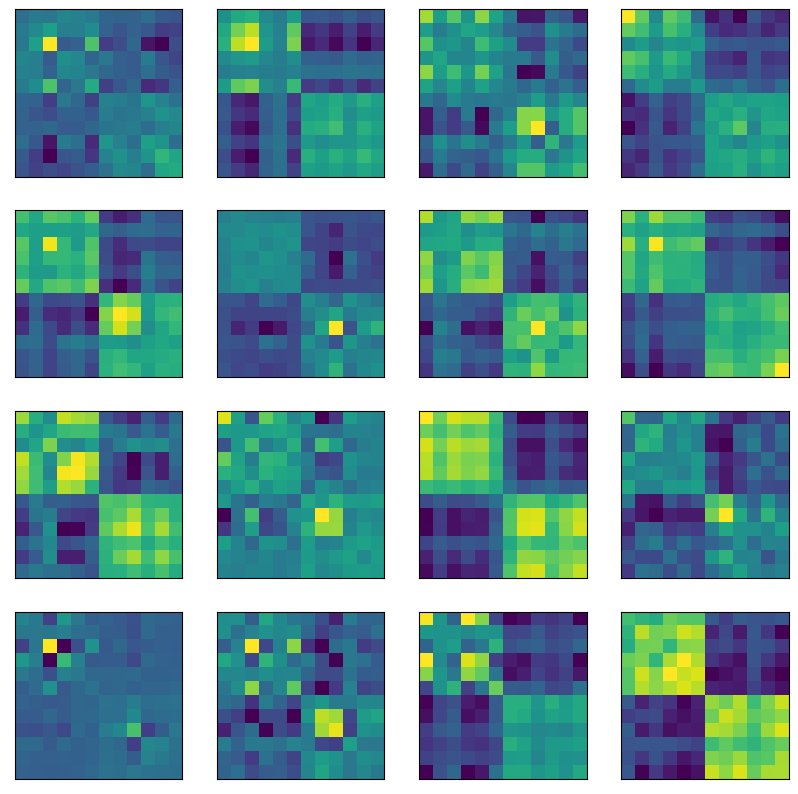

In [4]:
plt.figure(figsize=(10,10))
pcm.vis.plot_Gs(G1)

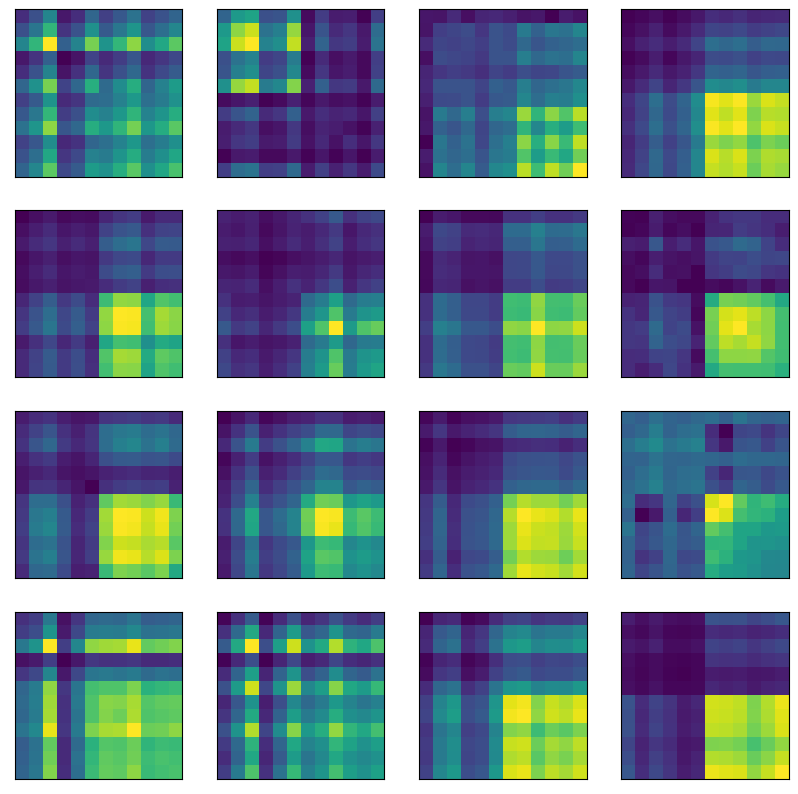

In [11]:
G, Ginf = srsa.cereb_parcel_rsa(label = "NettekovenSym68c32integLR", 
                                atlas_space = "SUIT3", 
                                subj = None,
                                type = "CondRun", 
                                label_name = "DR", 
                                reorder = ["phase", "recall"]
                                )
plt.figure(figsize=(10,10))
pcm.vis.plot_Gs(G)

### Cortical RSA

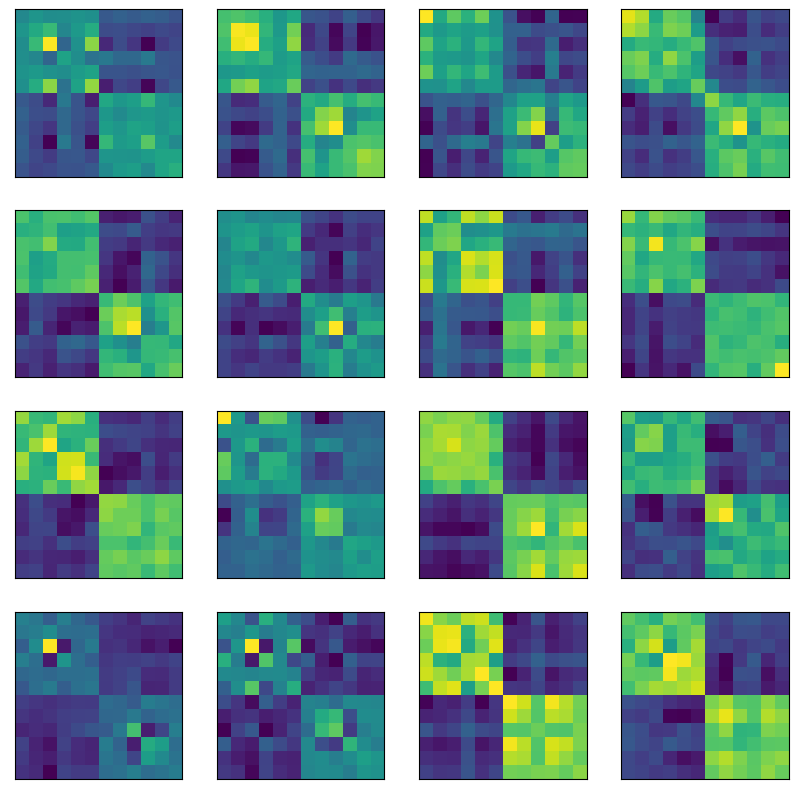

In [6]:
plt.figure(figsize=(10,10))
pcm.vis.plot_Gs(G2)


## Average cortical and cerebellar RSA

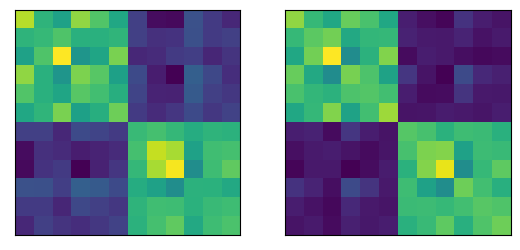

In [7]:
mG1 = G1.mean(axis=0)
mG2 = G2.mean(axis=0)
mG=np.stack([mG1,mG2])
pcm.vis.plot_Gs(mG,grid=(1,2))